In [2]:
from allennlp.data.token_indexers import PretrainedTransformerMismatchedIndexer
from allennlp.data.tokenizers import PretrainedTransformerTokenizer

In [3]:
from allennlp.data.token_indexers import PretrainedTransformerMismatchedIndexer
inxr = PretrainedTransformerMismatchedIndexer(model_name='google/electra-base-discriminator')

In [4]:
inxr._allennlp_tokenizer.tokenizer

PreTrainedTokenizerFast(name_or_path='google/electra-base-discriminator', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [5]:
my_tokinizer = PretrainedTransformerTokenizer('google/electra-base-discriminator')

In [6]:
my_tokinizer.tokenizer.save_pretrained("electra_tokenizer")

('electra_tokenizer/tokenizer_config.json',
 'electra_tokenizer/special_tokens_map.json',
 'electra_tokenizer/vocab.txt',
 'electra_tokenizer/added_tokens.json')

In [7]:
with open('/notebook/touche2021/output/run_xgboost.qrels', 'r') as f:
    lines = f.readlines()

In [8]:
with open('/notebook/touche2021/output/run_xgboost.qrels', 'r') as f:
    lines = f.readlines()

In [9]:
with open('/notebook/touche2021/output/run_xgboost_rw.qrels', 'w') as fp:
    for elem in lines:
        fp.write(elem)

In [10]:
lines[:4]

['51 0 clueweb12-0001wb-15-05765 1 2.4871463775634766 xgboost\n',
 '51 0 clueweb12-0904wb-53-21907 2 1.55696702003479 xgboost\n',
 '51 0 clueweb12-1807wb-60-03455 3 1.0395197868347168 xgboost\n',
 '51 0 clueweb12-1314wb-72-19073 4 0.6947941184043884 xgboost\n']

In [11]:
my_tokinizer.tokenizer.from_pretrained("electra_tokenizer")

PreTrainedTokenizerFast(name_or_path='electra_tokenizer', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [12]:
from my_functions import extractorRoberta

In [13]:
extractorRoberta(model_path = "/notebook/cqas/external_pretrained_models/")

/notebook/cqas/external_pretrained_models/roberta.hdf5
/notebook/cqas/external_pretrained_models/vocab_dir
encoder loaded
indexer loaded
model path  /notebook/cqas/external_pretrained_models/roberta.hdf5
model loaded
reader loaded


In [14]:
embedder = PretrainedTransformerEmbedder(model_name='google/electra-base-discriminator')
torch.save(embedder.transformer_model.state_dict(), 'embedder.ph')
embedder = PretrainedTransformerEmbedder(model_name='google/electra-base-discriminator', override_weights_file = 'embedder.ph')

NameError: name 'PretrainedTransformerEmbedder' is not defined

In [ ]:
new_embedder = PretrainedTransformerMismatchedEmbedder()

In [ ]:
!pwd


In [4]:
import pyterrier as pt
if not pt.started():
    pt.init()
import onir_pt

PyTerrier 0.5.0 has loaded Terrier 5.5 (built by craigmacdonald on 2021-05-20 13:12)
Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


/opt/.pyenv/versions/3.7.4/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data preprocessing



In [5]:
def read_xml(filename):
    # convert file filename to list of tuples (number_of_topic, title_of_topic) 
    # input: filename string
    # output: list of corresponding tuples
    answer_list = []
    xmldoc = minidom.parse(filename)
    itemlist = xmldoc.getElementsByTagName('topics')
    print(len(itemlist))
    print(itemlist)
    topic_list = itemlist[0].getElementsByTagName('topic')
    print (len(topic_list))
    for topic in topic_list:
        tuple_for_add = tuple((topic.getElementsByTagName('number')[0].firstChild.nodeValue, topic.getElementsByTagName('title')[0].firstChild.nodeValue))
        answer_list.append(tuple_for_add)
    return answer_list

In [6]:
from timeit import default_timer as timer

In [7]:
# read file
from xml.dom import minidom
import re
import pickle

topics_2020 = read_xml('topics-task-2.xml')
        
topics_2021 = read_xml('topics-task-2-only-titles-2021.xml')
        
with open('list_of_un_answ.pcl', 'rb') as f:
    answers_2020 = pickle.load(f)
            
with open('list_of_un_answ_2021.pcl', 'rb') as f:
    answers_2021 = pickle.load(f)
    
with open('touche2020-task2-relevance-withbaseline.qrels', 'r') as f:
    qrels_lines = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
qrels = [x.strip().split() for x in qrels_lines] 

qrels_dict = {}
for elem in qrels:
    query, noninf, docno, rank = elem
    if (query in qrels_dict.keys()):
        qrels_dict[query].append((docno, rank))
    else:
        qrels_dict[query] = []
        qrels_dict[query].append((docno, rank))

import pandas as pd
import re
info_df = pd.DataFrame(columns=["qid", "query", "docno", "text"],dtype=object)
info_df_test = pd.DataFrame(columns=["qid", "query", "docno", "text"], dtype=object)
qrels_df = pd.DataFrame(columns=["qid", "docno", "label"],dtype=object)
qrels_df_test = pd.DataFrame(columns=["qid", "docno", "label"],dtype=object)

print (0)

for elem in topics_2020:
    qid, query = elem[0], elem[1].strip('\n')
    query = re.sub(r'[^\w\s]','',query)
    for answer in answers_2020[qid]:
        docno = answer[1]
        score = answer[0]
        text = answer[3]
        df_row = {"qid":qid, "query":query, "docno":docno, "text":text}
        if (int(qid) < 40):
            info_df = info_df.append(df_row, ignore_index= True)
        else:
            info_df_test = info_df_test.append(df_row, ignore_index= True)
            
    for qrel in qrels_dict[qid]:
        docno, label = qrel
        df_row = {"qid":qid, "docno":docno, "label":label}
        if (int(qid) < 40):
            qrels_df = qrels_df.append(df_row, ignore_index= True)
        else:
            qrels_df_test = qrels_df_test.append(df_row, ignore_index= True)

            


1
[<DOM Element: topics at 0x7f56e1ebd7d0>]
50
1
[<DOM Element: topics at 0x7f56dda3e190>]
50
0


In [8]:
info_df.head()

,qid,query,docno,text
0,1,What is the difference between sex and love,clueweb12-1214wb-88-29751,sex may or may not include penetration. differ...
1,1,What is the difference between sex and love,clueweb12-1811wb-62-08418,having ’sex’ and a ‘rape’ are two completely d...
2,1,What is the difference between sex and love,clueweb12-0200wb-79-18105,"home &gt; articles &gt; sex, sexuality &amp; p..."
3,1,What is the difference between sex and love,clueweb12-1311wb-38-04762,home &gt;&gt;&gt; sex education 2.0 &gt;&gt;&g...
4,1,What is the difference between sex and love,clueweb12-0200tw-85-01106,things have changed so much and it has been ye...


In [9]:
lens = [len(elem) for elem in info_df['text']]

Populating the interactive namespace from numpy and matplotlib


/opt/.pyenv/versions/3.7.4/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([  33.,   71.,  152.,  292.,  455.,  639.,  973., 1103.,  101.,
           3.]),
 array([  7. ,  44.9,  82.8, 120.7, 158.6, 196.5, 234.4, 272.3, 310.2,
        348.1, 386. ]),
 <a list of 10 Patch objects>)

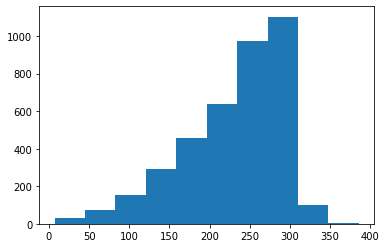

In [10]:
%pylab inline
import matplotlib.pyplot as plt 
plt.hist(lens)


# Bert

In [11]:
vbert = onir_pt.reranker('vanilla_transformer', 'bert', text_field='text', vocab_config={'train': True})

config file not found: config


## Pre-train on antique

In [6]:
vbert.config

{'batch_size': 4,
 'gpu': True,
 'gpu_determ': True,
 'random_seed': 42,
 'pre_validate': True,
 'max_train_it': 500,
 'patience': 20,
 'va_metrics': ['map', 'ndcg', 'P_10'],
 'train_count': 1024,
 'learning_rate': 0.001,
 'train_pos_source': 'intersect',
 'train_neg_source': 'run',
 'train_sampling': 'query',
 'train_pos_minrel': 1,
 'train_unjudged_rel': 0}

In [7]:
vbert.config['max_train_it'] = 10
vbert.config['train_count'] = 100
vbert.config['learning_rate'] = 0.0005

In [8]:
qrels_df['label']  = [int(elem) for elem in qrels_df['label']]

In [9]:
qrels_df_test['label'] = [int(elem) for elem in qrels_df_test['label']]

In [10]:
info_df.head()

,qid,query,docno,text
0,1,What is the difference between sex and love,clueweb12-1214wb-88-29751,sex may or may not include penetration. differ...
1,1,What is the difference between sex and love,clueweb12-1811wb-62-08418,having ’sex’ and a ‘rape’ are two completely d...
2,1,What is the difference between sex and love,clueweb12-0200wb-79-18105,"home &gt; articles &gt; sex, sexuality &amp; p..."
3,1,What is the difference between sex and love,clueweb12-1311wb-38-04762,home &gt;&gt;&gt; sex education 2.0 &gt;&gt;&g...
4,1,What is the difference between sex and love,clueweb12-0200tw-85-01106,things have changed so much and it has been ye...


In [11]:
info_df_test.head()

,qid,query,docno,text
0,40,Which operating system has better performance ...,clueweb12-0716wb-20-08246,a week after releasing the windows 8 consumer ...
1,40,Which operating system has better performance ...,clueweb12-0717wb-48-13632,windows 8 represents the biggest redesign of t...
2,40,Which operating system has better performance ...,clueweb12-0801wb-99-15301,users will need a windows 7 sp 1 system with a...
3,40,Which operating system has better performance ...,clueweb12-0500tw-35-13168,the company has published a blog that spells o...
4,40,Which operating system has better performance ...,clueweb12-1700tw-30-03487,windows 7 professional and ultimate users will...


In [12]:
vbert_antique.config['max_train_it'] = 30
vbert_antique.config['learning_rate'] = 0.00005

NameError: name 'vbert_antique' is not defined

In [13]:
start = timer()
vbert_antique.fit(info_df, qrels_df, info_df_test, qrels_df_test)
end = timer()
print ("time", end - start, flush = True)

NameError: name 'vbert_antique' is not defined

In [59]:
answs = vbert_antique.transform(info_df_test)

batches:   4%|▎         | 5/138 s<2.95s, 45.15it/s]

[2021-05-09 12:44:13,874][bert_help][DEBUG] using GPU (deterministic)
[2021-05-09 12:44:13,879][bert_help][DEBUG] [starting] batches


[2021-05-09 12:44:16,717][bert_help][DEBUG] [finished] batches: [2.84s] [138it] [48.66it/s]


In [60]:
def add_ranks1(rtr : pd.DataFrame) -> pd.DataFrame:
    """
        Canonical method for adding a rank column which is calculated based on the score attribute
        for each query. Note that the dataframe is NOT sorted by this operation.
        Arguments
            df: dataframe to create rank attribute for
    """
    rtr.drop(columns=["rank"], errors="ignore", inplace=True)
    if len(rtr) == 0:
        rtr["rank"] = pd.Series(index=rtr.index, dtype='int64')
        return rtr
    print (0)
    # -1 assures that first rank will be FIRST_RANK
    rtr["rank"] = rtr.groupby("qid", sort=False)["score"].rank(ascending=False, method="first").astype(int) -1 + 1
    print (1)
    if True:
        rtr.sort_values(["qid", "rank"], ascending=[True,True], inplace=True)
    return rtr


In [61]:
answs = add_ranks1(answs)

0
1


In [47]:
answs.head()

,qid,query,docno,text,score,rank
88,40,Which operating system has better performance ...,clueweb12-0604wb-40-13241,"we do recommend, however, going for windows vi...",5.477026,1
70,40,Which operating system has better performance ...,clueweb12-0809wb-06-00325,updated: our final and definitive verdict on t...,4.689868,2
3,40,Which operating system has better performance ...,clueweb12-0500tw-35-13168,the company has published a blog that spells o...,4.449025,3
38,40,Which operating system has better performance ...,clueweb12-1515wb-88-16954,an operating system’s main task is to provide ...,3.928699,4
89,40,Which operating system has better performance ...,clueweb12-0604wb-21-01684,while speed and responsiveness should always n...,3.395550,5


In [62]:
def write_qrels(output_dir, name, rtr):
    qids = rtr['qid']
    Q0s = [0 for elem in qids]
    docs = rtr['docno']
    scores = rtr['score']
    ranks = rtr['rank']
    tags = [name for elem in qids]
    common_list = list(zip(qids, Q0s, docs, ranks, scores, tags))
    print ("common_list ", common_list[:3])
    with open(output_dir + name +'.qrels', 'w') as fp:
        fp.write('\n'.join('%s %s %s %s %s %s' % x for x in common_list))
    print ("written " + name +'.txt')

In [63]:
!pwd

/notebook/touche2021


In [64]:
write_qrels('/notebook/touche2021/output/', "bert_antique", answs)

common_list  [('40', 0, 'clueweb12-0604wb-40-13241', 1, 10.837261199951172, 'bert_antique'), ('40', 0, 'clueweb12-1100tw-64-01206', 2, 10.836387634277344, 'bert_antique'), ('40', 0, 'clueweb12-1606wb-70-06224', 3, 10.822611808776855, 'bert_antique')]
written bert_antique.txt


### Pre-trained BERT

In [8]:
import pyterrier as pt
if not pt.started():
    pt.init()
#import onir_pt

PyTerrier 0.5.0 has loaded Terrier 5.4 (built by craigm on 2021-01-16 14:17)


In [12]:
from sklearn.model_selection import train_test_split
train_ds = pt.datasets.get_dataset('antique')
train_topics = train_ds.get_topics('train')
valid_topics = train_ds.get_topics('test')
 
# Index MS MARCO


In [13]:
train_topics.head(25)

,qid,query
0,3097310,what causes severe swelling and pain in the knees
1,3910705,why don t they put parachutes underneath airpl...
2,237390,how to clean alloy cylinder heads
3,2247892,how do i get them whiter
4,1078492,what is cloud 9 and 7th heaven
5,782453,how do you like your eggs
6,3198658,what is a conscience
7,1907320,how do i get college money
8,10895,how can u tell when a person is tellin u a lie
9,992730,how do you transfer voicemail messages onto tape


In [14]:
train_topics[train_topics.qid == '2271494'].values

array([['2271494',
        'why did jesus get mad at the pharisees for not killing children']],
      dtype=object)

In [15]:
len(train_topics)

2426

In [16]:
! pwd

/notebook/touche2021


In [17]:
f = open("/notebook/touche2021/terrier_antique/antique-collection.txt", "r")
a = f.readline()

In [18]:
import pandas as pd
import csv
corpus_df1 = pd.DataFrame(columns=["docno", "text"],dtype=object)
ind = 0
with open("/notebook/touche2021/terrier_antique/antique-collection.txt") as tsv:
    for line in csv.reader(tsv, dialect = 'excel-tab'):
        ind += 1
        if (ind%50000 == 0):
            print (ind) 
        docno, text = line
        if (docno == '3427615_4'):
            df_row = {"text":text, "docno":docno}
            corpus_df1 = corpus_df1.append(df_row, ignore_index= True)
       

50000
100000
150000
200000
250000
300000
350000
400000


In [19]:
corpus_df1.values

array([['3427615_4',
        'As a guess I would say that historically "kn" would have been pronounced differently to "n" and that time has altered the way the words are pronounced.  English is a very composite language made from Latin, Germainic, Nordic and several other tongues amalgamated into one gramatically confusing language.']],
      dtype=object)

In [20]:
corpus_df.head()

NameError: name 'corpus_df' is not defined

In [21]:
import pandas as pd
#corpus_df.to_pickle("corpus_df")
corpus_df = pd.read_pickle("corpus_df")


In [22]:
lens = [len(elem) for elem in corpus_df['text']]

Populating the interactive namespace from numpy and matplotlib


/opt/.pyenv/versions/3.7.4/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([20253., 27616., 22814., 19486., 15887., 13691., 11264.,  9364.,
         8082.,  6858.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <a list of 10 Patch objects>)

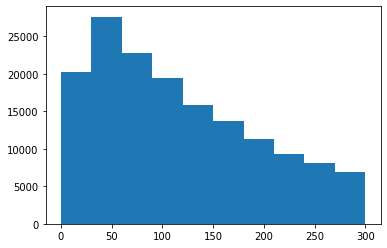

In [23]:
%pylab inline
import matplotlib.pyplot as plt 
plt.hist(lens)


In [24]:
corpus_df['lens'] = [len(elem) for elem in corpus_df['text']]

In [25]:
corpus_df = corpus_df.loc[corpus_df['lens'] <= 300]

In [26]:
len(corpus_df)

155315

In [27]:

from sklearn.model_selection import train_test_split
train_ds = pt.datasets.get_dataset('antique')
train_topics = train_ds.get_topics('train')
valid_topics = train_ds.get_topics('test')

train_qrels = train_ds.get_qrels('train')
val_qrels = train_ds.get_qrels('test')


In [28]:
train_topics[train_topics.qid == '3427615'].values

array([['3427615',
        'why do we put the letter k on the words knife and knob knee']],
      dtype=object)

In [29]:
qset = set(list(train_qrels.qid))

In [30]:
2271494
2452131
1873405
3427615
1043692
2464797
952062
2858043
1608105
3440161
3653952
2131177
2365151
330693
4082166
2449050
1372267
1191246
3764889
323517
2764410
1498260
488316
2859959
2854298
1239473
931698
291505
328356
558752

558752

In [31]:
for elem in qset:
    lbls = train_qrels[train_qrels.qid == elem].label
    if len(set(lbls)) > 4:
        print (elem)

In [32]:
corpus_df[corpus_df.docno == '3427615_0'].values

array([['3427615_0',
        'Any English word beginning with a (silent) k comes from the Low German (Dutch), where it was not silent but sounded : eg knob was knop, knife was knif.  In a word like knight, you have a double-German hangover : knight was knecht.  Early on in England they decided to spell the "ch" as "gh".',
        291]], dtype=object)

In [33]:
corpus_df[corpus_df.docno == '3427615_1'].values

array([['3427615_1', 'Because English is a funny language.', 36]],
      dtype=object)

In [34]:
corpus_df[corpus_df.docno == '3427615_2'].values

array([['3427615_2', "gee, i don't really (k)now!", 27]], dtype=object)

In [35]:
corpus_df[corpus_df.docno == '3427615_7'].values

array([['3427615_7',
        'They are saxon words. knife would have been pronounced ker-niff.',
        64]], dtype=object)

In [36]:
train_qrels[train_qrels.qid == '3427615']

,qid,docno,label
11085,3427615,3427615_0,4
11086,3427615,3427615_1,2
11087,3427615,3427615_2,1
11088,3427615,3427615_3,4
11089,3427615,3427615_4,3
11090,3427615,3427615_5,2
11091,3427615,3427615_6,2
11092,3427615,3427615_7,4


In [37]:
train_qrels[train_qrels.qid == '323517']

,qid,docno,label
13485,323517,323517_1,4
13486,323517,323517_21,2
13487,323517,323517_20,2
13488,323517,323517_22,2
13489,323517,323517_8,2
13490,323517,323517_9,4
13491,323517,323517_6,2
13492,323517,323517_7,3
13493,323517,323517_4,2
13494,323517,323517_5,1


In [38]:
corpus_df[corpus_df.docno == '323517_2'].values

array([], shape=(0, 3), dtype=object)

In [39]:
map_lbl = {0:0, 1:0, 2:1, 3:1, 4:2}
train_qrels['label'] = [map_lbl[elem] for elem in train_qrels['label']]
val_qrels['label'] = [map_lbl[elem] for elem in val_qrels['label']]

In [40]:
from sklearn.model_selection import train_test_split
train_ds = pt.datasets.get_dataset('antique')
train_topics = train_ds.get_topics('train')
valid_topics = train_ds.get_topics('test')

In [41]:
result = pd.merge(train_qrels, corpus_df, on=["docno"])
result = pd.merge(result, train_topics, on=["qid"])

In [42]:
result_val = pd.merge(val_qrels, corpus_df, on=["docno"])
result_val = pd.merge(result_val, valid_topics, on=["qid"])

In [43]:
val_qrels = result_val[['qid', 'docno', 'label']]

In [44]:
train_qrels = result[['qid', 'docno', 'label']]

In [45]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext.lower()

result['query'] = [cleanhtml(re.sub(r'[^\w\s]','',query)) for query in result['query']]
result['text'] = [cleanhtml(re.sub(r'[^\w\s]','',query)) for query in result['text']]

result_val['query'] = [cleanhtml(re.sub(r'[^\w\s]','',query)) for query in result_val['query']]
result_val['text'] = [cleanhtml(re.sub(r'[^\w\s]','',query)) for query in result_val['text']]

In [46]:
#result = result[['qid', 'query', 'docno', 'text']]
#result_val = result[['qid', 'query', 'docno', 'text']]

In [47]:
len(result)

9246

In [48]:
del corpus_df

In [49]:
corpus_df.head()

NameError: name 'corpus_df' is not defined

In [50]:
to_checkpoint

NameError: name 'to_checkpoint' is not defined

In [51]:
%load_ext autoreload
%autoreload 2
from bert_help import OpenNIRPyterrierReRanker

In [52]:
vbert_antique = OpenNIRPyterrierReRanker('vanilla_transformer', 'bert', text_field='text', vocab_config={'train': True})

In [53]:
vbert_antique.to_checkpoint("bert_pre_trained_on_antique")

In [54]:
vbert_antique.config

{'batch_size': 4,
 'gpu': True,
 'gpu_determ': True,
 'random_seed': 42,
 'pre_validate': True,
 'max_train_it': 500,
 'patience': 20,
 'va_metrics': ['map', 'ndcg', 'P_10'],
 'train_count': 1024,
 'learning_rate': 0.001,
 'train_pos_source': 'intersect',
 'train_neg_source': 'run',
 'train_sampling': 'query',
 'train_pos_minrel': 1,
 'train_unjudged_rel': 0}

In [55]:
vbert_antique.config['max_train_it'] = 100
vbert_antique.config['train_count'] = 300
#vbert_antique.config['learning_rate'] = 0.00001
vbert_antique.config['batch_size'] = 8

In [59]:
#del vbert_antique

In [55]:
import pandas as pd
#result.to_pickle("result")
#result = pd.read_pickle("result")
#train_qrels.to_pickle("train_qrels")
#train_qrels = pd.read_pickle("train_qrels")

#result_val.to_pickle("result_val")
#result_val = pd.read_pickle("result_val")
#val_qrels.to_pickle("val_qrels")
#val_qrels = pd.read_pickle("val_qrels")



In [56]:
val_qrels.head()

,qid,docno,label
0,1964316,1964316_5,2
1,1964316,1674088_11,0
2,1964316,1218838_13,1
3,1964316,4126855_1,1
4,1964316,2434719_9,1


In [ ]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="1"
start = timer()
vbert_antique.fit(result, train_qrels, result_val, val_qrels)
end = timer()
print (end - start)

In [ ]:
608.94673

In [2]:
!nvidia-smi

Fri Jun 25 20:49:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.80       Driver Version: 460.80       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 27%   31C    P8    13W / 260W |   8190MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:1B:00.0 Off |                  N/A |
| 27%   